<a href="https://colab.research.google.com/github/VidyaValsalan/Deploy-RLprediction/blob/master/LSTM-Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving excel_model_15.csv to excel_model_15.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "excel_model_15.csv" with length 5019 bytes


In [8]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['excel_model_15.csv'].decode('utf-8')),names=['date','4599','4291','5054','2157','4234','1018','22420','18494','19505','10215','11478','13223','16309','370'])
df1.head(5)
a=input('Enter the Location ID')

Enter the Location ID4291


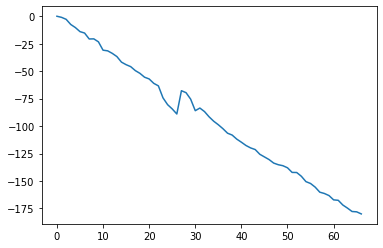

In [9]:
df1=df1.reset_index()[a]
df1.plot()
d=df1

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=800,batch_size=64,verbose=1)

Epoch 1/800
1/1 [==============================] - 0s 45ms/step - loss: 0.0011 - val_loss: 8.0962e-04
Epoch 2/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 8.0664e-04
Epoch 3/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 8.0362e-04
Epoch 4/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 8.0056e-04
Epoch 5/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 7.9748e-04
Epoch 6/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 7.9435e-04
Epoch 7/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 7.9119e-04
Epoch 8/800
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 7.8799e-04
Epoch 9/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 7.8475e-04
Epoch 10/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - 

In [44]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [45]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.025877817410929333

In [46]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.03301468163812993

In [47]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

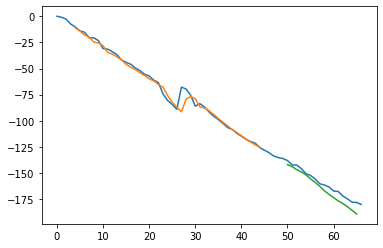

In [37]:
import matplotlib.pyplot as plt
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
len(test_data)

21

In [38]:
x_input=test_data[17:].reshape(1,-1)
x_input.shape

(1, 4)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
#prediction for next n days
from numpy import array

lst_output=[]
n_steps=4
i=0
while(i<60):
    
    if(len(temp_input)>4):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[-0.07942098]
5
1 day input [ 0.01222222  0.01055556  0.         -0.07942098]
1 day output [[-0.10899308]]
2 day input [ 0.01055556  0.         -0.07942098 -0.10899308]
2 day output [[-0.14811143]]
3 day input [ 0.         -0.07942098 -0.10899308 -0.14811143]
3 day output [[-0.19303793]]
4 day input [-0.07942098 -0.10899308 -0.14811143 -0.19303793]
4 day output [[-0.23859826]]
5 day input [-0.10899308 -0.14811143 -0.19303793 -0.23859826]
5 day output [[-0.27649572]]
6 day input [-0.14811143 -0.19303793 -0.23859826 -0.27649572]
6 day output [[-0.3140982]]
7 day input [-0.19303793 -0.23859826 -0.27649572 -0.31409821]
7 day output [[-0.3483123]]
8 day input [-0.23859826 -0.27649572 -0.31409821 -0.34831229]
8 day output [[-0.3778239]]
9 day input [-0.27649572 -0.31409821 -0.34831229 -0.37782389]
9 day output [[-0.40273038]]
10 day input [-0.31409821 -0.34831229 -0.37782389 -0.40273038]
10 day output [[-0.42398885]]
11 day input [-0.34831229 -0.37782389 -0.40273038 -0.42398885]
11 day outpu

In [41]:
day_new=np.arange(1,5)
day_pred=np.arange(5,65)

In [42]:
import matplotlib.pyplot as plt
len(df1)

67

In [49]:
df3=[]
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
df3 = pd.DataFrame(df3)
data = pd.read_csv('try.csv')
data['LocationID'] = df3 # changed here
data.to_csv('try.csv', index=False, mode= 'w')